In [8]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.patches import Patch
from matplotlib.lines import Line2D
import os

In [9]:
### TODO ###
### CHECK IF THE PLOTS ARE LOGICAL ###

In [15]:
### IMPORTING FILES ###
results_dir = "/Users/maartendoekhie/Desktop/lunar_lander/results"

# Training data

# Custom DQN
moving_avg_scores_DQN = np.load(os.path.join(results_dir, "moving_avg_scores_DQN.npy"))
episode_scores_DQN = np.load(os.path.join(results_dir, "episode_scores_DQN.npy"))
epsilon_values_DQN = np.load(os.path.join(results_dir, "epsilon_values_DQN.npy"))
episode_lengths_DQN = np.load(os.path.join(results_dir, "episode_lengths_DQN.npy"))
timestep_counts_DQN = np.load(os.path.join(results_dir, "timestep_counts_DQN.npy"))

# SB3 DQN 
moving_avg_scores_DQN_SB3 = np.load(os.path.join(results_dir, "moving_avg_scores_DQN_SB3.npy"))
episode_scores_DQN_SB3 = np.load(os.path.join(results_dir, "episode_scores_DQN_SB3.npy"))
epsilon_values_DQN_SB3 = np.load(os.path.join(results_dir, "epsilon_values_DQN_SB3.npy"))
episode_lengths_DQN_SB3 = np.load(os.path.join(results_dir, "episode_lengths_DQN_SB3.npy"))
timestep_counts_DQN_SB3 = np.load(os.path.join(results_dir, "timestep_counts_DQN_SB3.npy"))

# SB3 A2C
moving_avg_scores_a2c = np.load(os.path.join(results_dir, "moving_avg_scores_A2C.npy"))
episode_scores_a2c = np.load(os.path.join(results_dir, "episode_scores_A2C.npy"))
episode_lengths_a2c = np.load(os.path.join(results_dir, "episode_lengths_A2C.npy"))
timestep_counts_a2c = np.load(os.path.join(results_dir, "timestep_counts_A2C.npy"))

# Evaluation data

# Custom DQN
eval_rewards_DQN = np.load(os.path.join(results_dir, "eval_rewards_DQN.npy"))
eval_lengths_DQN = np.load(os.path.join(results_dir, "eval_lengths_DQN.npy"))
mean_reward_DQN = np.load(os.path.join(results_dir, "mean_reward_DQN.npy"))
std_reward_DQN = np.load(os.path.join(results_dir, "std_reward_DQN.npy"))

# SB3 DQN
eval_rewards_DQN_SB3 = np.load(os.path.join(results_dir, "eval_rewards_DQN_SB3.npy"))
eval_lengths_DQN_SB3 = np.load(os.path.join(results_dir, "eval_lengths_DQN_SB3.npy"))
mean_reward_DQN_SB3 = np.load(os.path.join(results_dir, "mean_reward_DQN_SB3.npy"))
std_reward_DQN_SB3 = np.load(os.path.join(results_dir, "std_reward_DQN_SB3.npy"))

# SB3 A2C
eval_rewards_A2C = np.load(os.path.join(results_dir, "eval_rewards_A2C.npy"))
eval_lengths_A2C = np.load(os.path.join(results_dir, "eval_lengths_A2C.npy"))
mean_reward_A2C = np.load(os.path.join(results_dir, "mean_reward_A2C.npy"))
std_reward_A2C = np.load(os.path.join(results_dir, "std_reward_A2C.npy"))


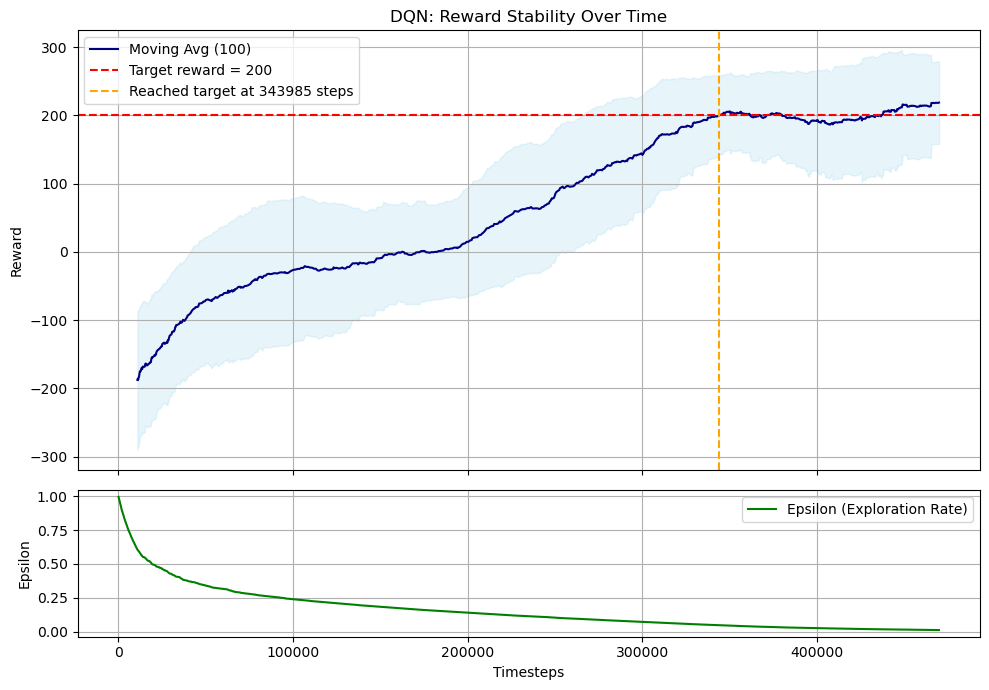

In [16]:
### DQN PLOTS ###

# Moving avg and std
window = 100  # Window for moving avg's
moving_avg = np.convolve(episode_scores_DQN, np.ones(window) / window, mode='valid')
std_dev = [
    np.std(episode_scores_DQN[max(0, i - window):i])
    for i in range(window, len(episode_scores_DQN) + 1)
]

# Find first timestep reaching target
target_reward = 200
reach_idx = next((i for i, avg in enumerate(moving_avg) if avg >= target_reward), None)
reach_timestep = timestep_counts_DQN[window - 1 + reach_idx] if reach_idx is not None else None

# Figure
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(10, 7), sharex=True, gridspec_kw={'height_ratios': [3, 1]})

# subfig 1: Reward and moving avg vs timesteps
ax1.plot(timestep_counts_DQN[window - 1:], moving_avg, label="Moving Avg (100)", color='navy')
ax1.fill_between(
    timestep_counts_DQN[window - 1:], 
    np.array(moving_avg) - std_dev, 
    np.array(moving_avg) + std_dev, 
    alpha=0.2, color='skyblue'
)
ax1.axhline(target_reward, color='r', linestyle='--', label=f'Target reward = {target_reward}')

# Add vertical line if target reached
if reach_timestep is not None:
    ax1.axvline(reach_timestep, color='orange', linestyle='--',
                label=f"Reached target at {reach_timestep} steps")

ax1.set_title("DQN: Reward Stability Over Time")
ax1.set_ylabel("Reward")
ax1.legend()
ax1.grid(True)

# subfig 2: Epsilon vs timesteps
ax2.plot(timestep_counts_DQN, epsilon_values_DQN, color='green', label="Epsilon (Exploration Rate)")
ax2.set_xlabel("Timesteps")
ax2.set_ylabel("Epsilon")
ax2.legend()
ax2.grid(True)

plt.tight_layout()
plt.show()


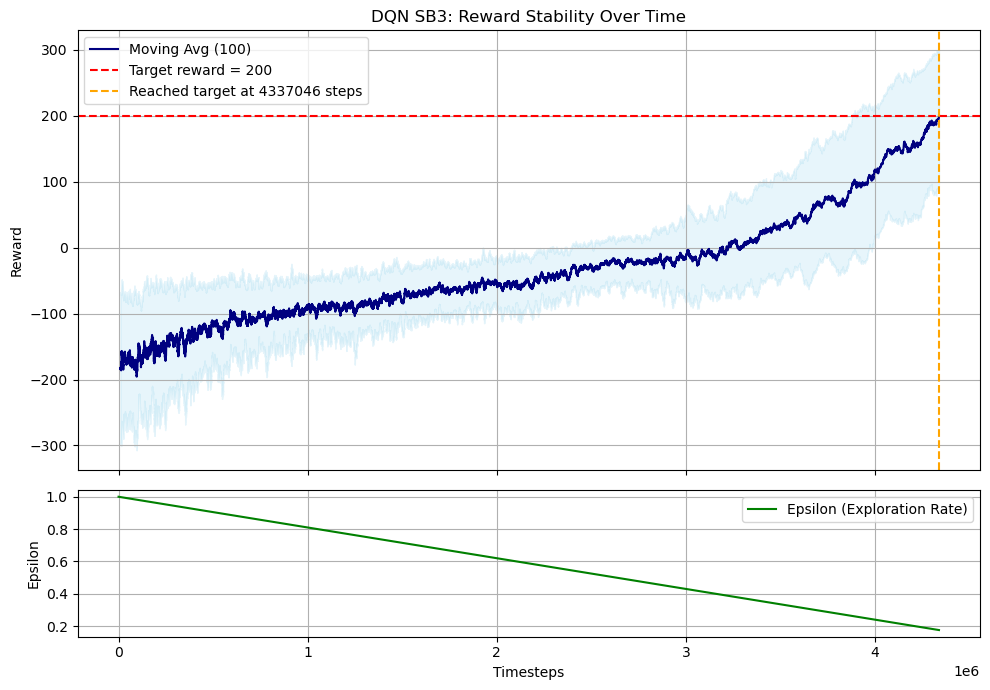

In [17]:
### DQN PLOTS (SB3) ###

# Moving avg and std
window = 100  # Window for moving avg's
moving_avg = np.convolve(episode_scores_DQN_SB3, np.ones(window) / window, mode='valid')
std_dev = [
    np.std(episode_scores_DQN_SB3[max(0, i - window):i])
    for i in range(window, len(episode_scores_DQN_SB3) + 1)
]

# Find first timestep reaching target
target_reward = 200
reach_idx = next((i for i, avg in enumerate(moving_avg) if avg >= target_reward), None)
reach_timestep = (
    timestep_counts_DQN_SB3[window - 1 + reach_idx] if reach_idx is not None else None
)

# Figure
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(10, 7), sharex=True,
                               gridspec_kw={'height_ratios': [3, 1]})

# subfig 1: Reward and moving avg vs timesteps
ax1.plot(timestep_counts_DQN_SB3[window - 1:], moving_avg, label="Moving Avg (100)", color='navy')
ax1.fill_between(
    timestep_counts_DQN_SB3[window - 1:],
    np.array(moving_avg) - std_dev,
    np.array(moving_avg) + std_dev,
    alpha=0.2, color='skyblue'
)
ax1.axhline(target_reward, color='r', linestyle='--', label=f'Target reward = {target_reward}')

# Vertical line when target reached
if reach_timestep is not None:
    ax1.axvline(reach_timestep, color='orange', linestyle='--',
                label=f"Reached target at {reach_timestep} steps")

ax1.set_title("DQN SB3: Reward Stability Over Time")
ax1.set_ylabel("Reward")
ax1.legend()
ax1.grid(True)

# subfig 2: Epsilon vs timesteps
ax2.plot(timestep_counts_DQN_SB3, epsilon_values_DQN_SB3, color='green', label="Epsilon (Exploration Rate)")
ax2.set_xlabel("Timesteps")
ax2.set_ylabel("Epsilon")
ax2.legend()
ax2.grid(True)

plt.tight_layout()
plt.show()


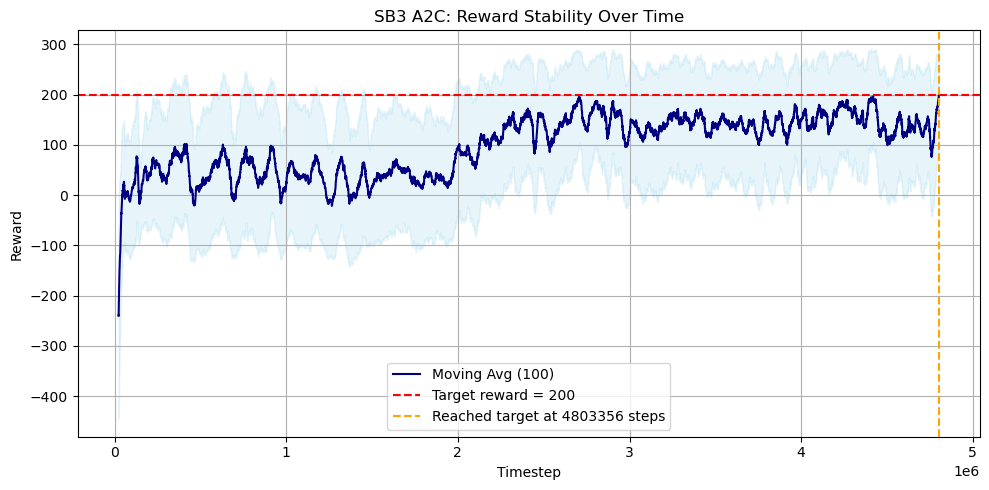

In [18]:
# parameters
window = 100
results_dir = "/Users/maartendoekhie/Desktop/lunar_lander/results"

# Load A2C data
episode_scores_A2C = np.load(os.path.join(results_dir, "episode_scores_A2C.npy"))
timestep_counts_A2C = np.load(os.path.join(results_dir, "timestep_counts_A2C.npy"))

# Compute moving average and std
moving_avg_A2C = np.convolve(episode_scores_A2C, np.ones(window) / window, mode='valid')
std_dev_A2C = np.array([
    np.std(episode_scores_A2C[i - window:i])
    for i in range(window, len(episode_scores_A2C) + 1)
])

# Cut time vector to match moving average
timesteps_A2C_trimmed = timestep_counts_A2C[window - 1:]

# Find first timestep reaching target
target_reward = 200
reach_idx = next((i for i, avg in enumerate(moving_avg_A2C) if avg >= target_reward), None)
reach_timestep = (
    timesteps_A2C_trimmed[reach_idx] if reach_idx is not None else None
)

# Figure
fig, ax = plt.subplots(figsize=(10, 5))

ax.plot(timesteps_A2C_trimmed, moving_avg_A2C, label="Moving Avg (100)", color='navy')
ax.fill_between(
    timesteps_A2C_trimmed,
    moving_avg_A2C - std_dev_A2C,
    moving_avg_A2C + std_dev_A2C,
    alpha=0.2, color='skyblue'
)

# Add target reward line
ax.axhline(target_reward, color='r', linestyle='--', label=f'Target reward = {target_reward}')

# Add vertical line when target reached
if reach_timestep is not None:
    ax.axvline(reach_timestep, color='orange', linestyle='--',
               label=f"Reached target at {reach_timestep} steps")

# Labels and legend
ax.set_title("SB3 A2C: Reward Stability Over Time")
ax.set_ylabel("Reward")
ax.set_xlabel("Timestep")
ax.legend()
ax.grid(True)
plt.tight_layout()
plt.show()


[ 746  438  532 1000  842  401  408 1000 1000 1000  378  381  702 1000
 1000 1000  326  489  301  391  222  324 1000  545  663   92  863  238
  259  515  239  405  777  273  449  605  130  328  285  339  855  398
  392 1000 1000  974  988  119   95  565  504  373  362  651  495  603
  509 1000  497  467  382 1000  624  332  815  437  875  601 1000  470
  562  332   82  750  548  257  408  687 1000  380  955  297  548  342
  158  263  316  636  612  534  812  354 1000  862  440  432  531  709
 1000  491]


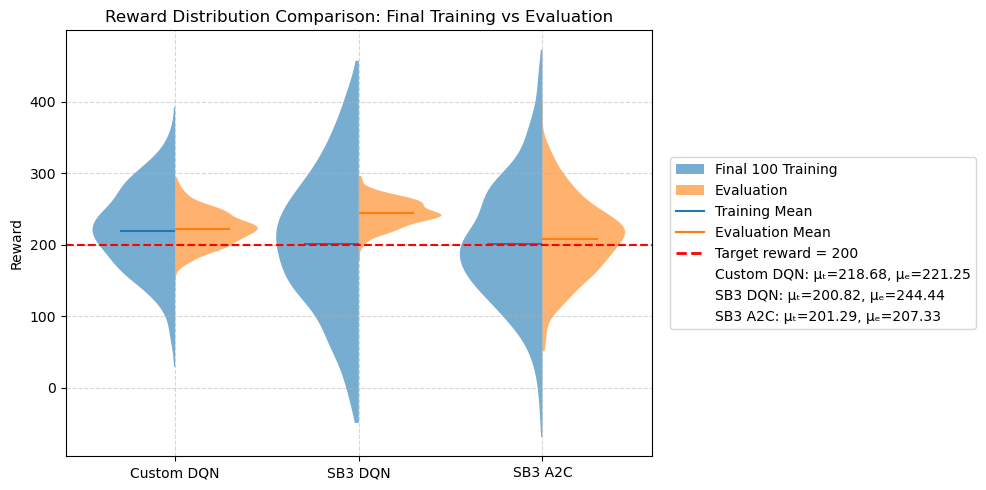

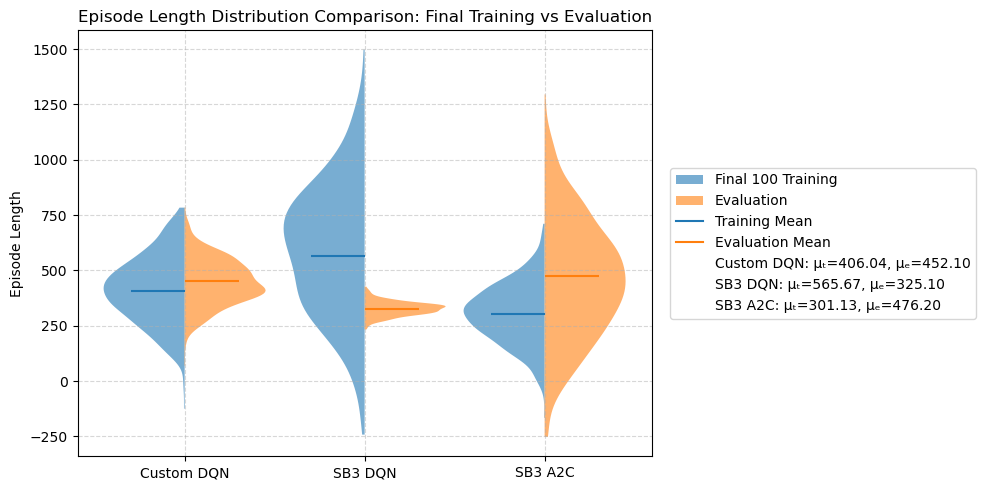

In [14]:
# Violin
def get_violin_samples(train_values, eval_values):
    mu_train = np.mean(train_values)
    std_train = np.std(train_values)
    mu_eval = np.mean(eval_values)
    std_eval = np.std(eval_values)
    samples_train = np.random.normal(mu_train, std_train, 500)
    samples_eval = np.random.normal(mu_eval, std_eval, 500)
    return samples_train, samples_eval, mu_train, mu_eval

# prepare data rewards
final_train_rewards = episode_scores_DQN[-100:]
final_train_rewards_SB3 = episode_scores_DQN_SB3[-100:]
final_train_rewards_A2C = episode_scores_a2c[-100:]

samples_rewards = [
    get_violin_samples(final_train_rewards, eval_rewards_DQN),
    get_violin_samples(final_train_rewards_SB3, eval_rewards_DQN_SB3),
    get_violin_samples(final_train_rewards_A2C, eval_rewards_A2C)
]

# prepare data lengths
final_train_lengths = episode_lengths_DQN[-100:]
final_train_lengths_SB3 = episode_lengths_DQN_SB3[-100:]
final_train_lengths_A2C = episode_lengths_a2c[-100:]

print(final_train_lengths_SB3)

samples_lengths = [
    get_violin_samples(final_train_lengths, eval_lengths_DQN),
    get_violin_samples(final_train_lengths_SB3, eval_lengths_DQN_SB3),
    get_violin_samples(final_train_lengths_A2C, eval_lengths_A2C)
]

# violin plotting function
def plot_violin(samples_list, labels, ylabel, title, show_target_line=False):
    fig, ax = plt.subplots(figsize=(10, 5))
    positions = [1, 2, 3]

    mus = []
    for i, (samples_train, samples_eval, mu_train, mu_eval) in enumerate(samples_list):
        pos = positions[i]
        mus.append((mu_train, mu_eval))

        # Training (left half)
        parts_train = ax.violinplot(samples_train, positions=[pos], showmeans=False, showextrema=False, widths=0.9)
        for b in parts_train['bodies']:
            m = np.mean(b.get_paths()[0].vertices[:, 0])
            b.get_paths()[0].vertices[:, 0] = np.clip(b.get_paths()[0].vertices[:, 0], -np.inf, m)
            b.set_facecolor('tab:blue')
            b.set_alpha(0.6)

        # Evaluation (right half)
        parts_eval = ax.violinplot(samples_eval, positions=[pos], showmeans=False, showextrema=False, widths=0.9)
        for b in parts_eval['bodies']:
            m = np.mean(b.get_paths()[0].vertices[:, 0])
            b.get_paths()[0].vertices[:, 0] = np.clip(b.get_paths()[0].vertices[:, 0], m, np.inf)
            b.set_facecolor('tab:orange')
            b.set_alpha(0.6)

        # Plot mean lines
        ax.hlines(mu_train, pos - 0.3, pos, color='tab:blue', linewidth=1.5)
        ax.hlines(mu_eval, pos, pos + 0.3, color='tab:orange', linewidth=1.5)

    # formatting axes
    ax.set_xticks(positions)
    ax.set_xticklabels(labels)
    ax.set_ylabel(ylabel)
    ax.set_title(title)
    if show_target_line:
        ax.axhline(200, color='red', linestyle='--')  # Only for reward

    # formatting legend
    legend_elements = [
        Patch(facecolor='tab:blue', alpha=0.6, label='Final 100 Training'),
        Patch(facecolor='tab:orange', alpha=0.6, label='Evaluation'),
        Line2D([0], [0], color='tab:blue', lw=1.5, label='Training Mean'),
        Line2D([0], [0], color='tab:orange', lw=1.5, label='Evaluation Mean')
    ]
    if show_target_line:
        legend_elements.append(Line2D([0], [0], color='red', lw=2, linestyle='--', label="Target reward = 200"))

    for lbl, (mu_t, mu_e) in zip(labels, mus):
        legend_elements.append(Line2D([0], [0], color='white', lw=0,
                                      label=f"{lbl}: μₜ={mu_t:.2f}, μₑ={mu_e:.2f}"))

    ax.legend(handles=legend_elements, loc='center left', bbox_to_anchor=(1.02, 0.5), frameon=True)
    ax.grid(True, linestyle='--', alpha=0.5)
    plt.tight_layout()
    plt.show()


plot_violin(samples_rewards, ['Custom DQN', 'SB3 DQN', 'SB3 A2C'],
            ylabel="Reward", title="Reward Distribution Comparison: Final Training vs Evaluation", show_target_line=True)

plot_violin(samples_lengths, ['Custom DQN', 'SB3 DQN', 'SB3 A2C'],
            ylabel="Episode Length", title="Episode Length Distribution Comparison: Final Training vs Evaluation", show_target_line=False)